********************************************************;
* PRINCIPAL COMPONENTS ANALYSIS:
*
* An impartial panel judges the taste of apples at different levels
*   of 5 covariates: 3 soil nutrients and 2 amounts of shade
*   and water.
*
* Which of the covariates are most important?  Are any important?
*   Are some combinations better than others?
*
* One approach to disentangling joint effects in covariates is
*   called `Principal Components Analysis' (PCA).
*
* PCA imagines the covariates as a set in a high dimensional space
*   (here as 5 points in R^14) and asks if this set is really
*   lower dimensional. For example, if the 5 points in R^14 are
*   concentrated in a two-dimensional subspace, then a change of
*   variables may effectively reduce the number of covariates to two.
*
* This process can also be viewed as looking for various indices
*   (or `factors') of the covariate data. In our case, there might
*   be a (Na,K) index and a (P,Water,Shade) index. The basic idea is
*   that, if we are lucky, one or two such indices might explain
*   most of the variation among the covariates. 
*
* PCA proceeds by first finding the axis along which this set is
*   most elongated (here, in R^14). By convention, a vector in this
*   direction whose length is the sample variance of the covariates
*   in that direction is called the `first principal component' 
*   (or the first PC).  We next look for the axis orthogonal to the
*   first PC along which the set is next most elongated, and define
*   the second PC correspondingly. The third PC is orthogonal to
*   both the first and second PCs. If the covariate data is
*   5 dimensional (as in this case), there will be five PCs, which
*   will form an orthogonal set of 5 vectors in R^14.
*
* This orthogonal decomposition is usually done after first
*   normalizing the covariates so that each covariate has mean zero
*   and variance one. This is equivalent to rescaling the values of
*   each covariate in terms of its mean and standard deviation.
*   If this isn't done, then a covariate whose measured values
*   happened to have high variance could dominate the PC selection
*   process. This covariate might have high variance just because
*   it happened to be measured in milligrams rather than grams, or
*   in minutes instead of hours.  If all covariates are in the same
*   units, or have similar variances, or if their variances differ
*   but you don't mind weighting the covariates in terms of their
*   measured variances, then the step of normalizing the covariates
*   can be skipped. SAS does this normalization automatically
*   unless you tell SAS otherwise.
*
* In normalized coordinates, the maximum expected length (squared)
*   of the covariate data set (here the 5 points in R^14) is in
*   the direction of the eigenvector of the largest eigenvalue of
*   the correlation matrix  Corr(X)  of the columns of X, where the
*   covariate data is viewed as a 14x5 matrix in this case. The
*   length of the first PC is the eigenvalue itself. This is because
*
*     max { Var(Xv): v'v=1 } = max { v'Corr(X)v: v'v=1 } = la_1
*
*   where la_1 is the largest eigenvalue. The second identity
*   follows from the spectral decomposition of Corr(X). Since the
*   columns of X have been normalized to have mean zero and variance
*   one, ``Var(Xv)'' is the sum of the squares of the dot products
*   of v in R^5 with the covariate data rows, with the sum divided
*   by n-1 to form a sample variance. The sum of squares of these
*   dot products (divided by n-1) is la_1, which is the largest
*   eigenvalue of Corr(X), and the unit vector v that maximizes
*   Var(Xv) is the first eigenvector. Similarly, the i-th PC is the
*   eigenvector of Corr(X) with the i-th largest eigenvalue
*   normalized to have that eigenvalue as its length.
*
* Since the sum of the eigenvalues of any matrix is its trace, and
*   since a correlation matrix Corr(X) has ones on its diagonal,
*   the sum of the eigenvalues la_i of Corr(X) equals its dimension
*   (here, 5), which is also the same as the number of covariates.
*
* The PCs, as we have defined them, are vectors in R^14 obtained by
*   applying a rotation matrix to the normalized columns of X. The
*   rows of the rotated matrix are called the PC SCORES (for each 
*   observation). In this case, the PCs are in R^14 and the PC scores
*   for each observation are in R^5. Since the i-th PC is formed
*   from dot products of the i-th eigenvector of Corr(X) with the
*   individual data rows, the sum of the squares of the i-th PC is
*   equal to the i-th eigenvalue, la_i. (See below for a more direct
*   derivation of this fact.)
*
* In practice, for many real multivariate data sets X, most of the
*   variation of the covariate data is explained by the first PC.
*   This means that the first eigenvalue is large (close to 5 in this
*   case) and the rest are small.  In other cases, most of the
*   variation is explained by the first two PCs.
*
* In general, PCs with eigenvalues less than 1 are often ignored.
*   For example, assume that the first two eigenvalues add up to 4.7
*   out of a total of 5. This means that the sum of the squares of the
*   first two PC data columns is 4.7 and the sum of the squares of the
*   remaining three PC data columns is 0.3. Since the PC data
*   columns result from the same rotation applied to each original
*   data row, the sum of the squares of 5 PC data columns is the
*   same as the sum of the squares of the original covariate
*   coefficients. In this sense, the first two PCs ``explain''
*   4.7/5 = 94% of the variability of the covariates. (More exactly,
*   the sum of squares of the first two PC data columns is 94% of
*   the sums of the squares of all normalized covariate entries.)
*
* As a consistency check, note that, if the covariate vectors in
*   R^14 are projected onto the first two PCs, then the resulting
*   14x5 design matrix X has column rank two. A basis for the
*   column space of X is the two PCs (in R^14).
*
* If you express covariates in terms of PCs but keep all 5 PCs, then
*   you have just rotated your original data and you have lost no
*   information. The Model R^2 of any regression will be the same
*   whether you use the 5 original covariates or the 5 PC data
*   columns. If you drop PCs (more exactly, PC data columns) with
*   small eigenvalues, then the Model R^2 should drop by a small
*   amount, unless for some reason the observed data (here Taste)
*   happens to depend strongly on on a PC that happens to have small
*   relative variability among the covariates. This can happen, but
*   tends to happen infrequently.
*
*
* The advantages of Principal Components Analysis (`PCA') are
*
* (1) The first one or two (and sometimes three) PCs are often
*   easily interpretable. That is, the covariates that have large
*   coefficients in the PC have obvious things in common and a
*   common effect of these covariates explains some aspect (or
*   `factor') of the covariates. For example, for data for census
*   tracts, these might be housing quality, with many different
*   covariates measuring this, amount of education, again with
*   many different direct or indirect measurements, and so forth.
*
* (2) The principal components are `orthogonal'. This implies that
*   the Type I and Type III tables for regressions on the PCs will
*   be exactly the same. Thus you do not have to worry about PCs
*   being partially explained in the regression by the effects of
*   other PCs.
*
* The disadvantages are:
*
* (1) Principal components are often arbitrary linear combinations
*   of concrete quantities, and thus may involve combining apples
*   and oranges, or even worse combining a third of an apple with
*   half of an orange minus 3/4 of a grapefruit. Sometimes these
*   combinations make sense (and explain an underlying factor in the
*   data that you might not have noticed), but sometimes they do not.
*   After the first one or two PCs, the remaining PCs are usually
*   interpretable.
*
* (2) Principal components summarize the covariates in a way that is
*   independent of the observed values. It can happen that PCs that
*   are relatively unimportant for the covariate cloud are what is
*   most important to the observed values (here, Y=Apple taste).
*   However, even in that case, the orthogonality of the principal
*   components can make the resulting regression output easier
*   to understand.
*
* (3) If you are unlucky, none of the principal components will be
*   interpretable. That is, the covariates with large coefficients
*   may have nothing obvious in common. In that case, the regression
*   on the prinicipal components may be less illuminating than the
*   original regression. However, in that case, you have lost
*   nothing and you can go back to the original regression.
*
********************************************************;

In [1]:
title 'APPLE TASTE with 5 covariates - YOURNAME';
title2 'PRINCIPAL COMPONENTS ANALYSIS;';
options ls=75 ps=60 pageno=1 nocenter;

data appledat;
   input farm$ yy nat kk pp shade water;
   * Descriptive text for each variable;
   label  yy='Taste'  nat='Sodium'   kk='Potassium'
     pp='Phosphorus' shade='Shade'  water='Water';

datalines;
   A    2876     20.0    38    2488   2.42    216
   B    2078     11.1    13    2998   1.62    321
   C    3052     19.8    31    3835   2.79    376
   D    2265     13.9    19    2360   1.65    265
   E     940     17.0    24     233   0.86     18
   F    2815     16.9    26    3922   2.70    369
   G    2661     11.6    16    4343   2.40    453
   H    2181     14.3    22    3110   2.05    267
   I    2052     10.5    13    2869   1.63    286
   J    2064     18.2    31    2335   2.17    252
   K    1551      8.3     8    1784   0.84    185
   L    2338     20.4    36    2601   2.47    275
   M    1753      8.7    18    2124   1.27    201
   N    2110      7.5     4    4408   1.85    411
     ;


proc print;
     title3 'The data as SAS sees it';  run;

Obs,farm,yy,nat,kk,pp,shade,water
1,A,2876,20.0,38,2488,2.42,216
2,B,2078,11.1,13,2998,1.62,321
3,C,3052,19.8,31,3835,2.79,376
4,D,2265,13.9,19,2360,1.65,265
5,E,940,17.0,24,233,0.86,18
6,F,2815,16.9,26,3922,2.70,369
7,G,2661,11.6,16,4343,2.40,453
8,H,2181,14.3,22,3110,2.05,267
9,I,2052,10.5,13,2869,1.63,286
10,J,2064,18.2,31,2335,2.17,252



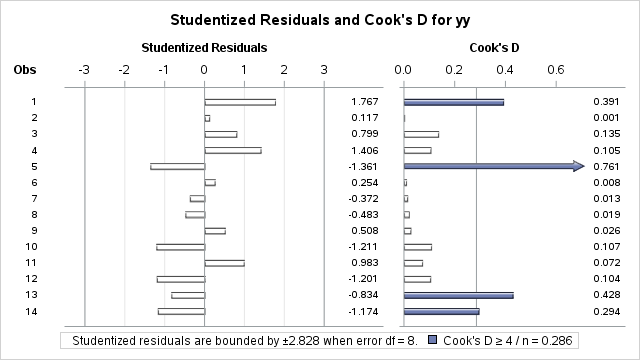
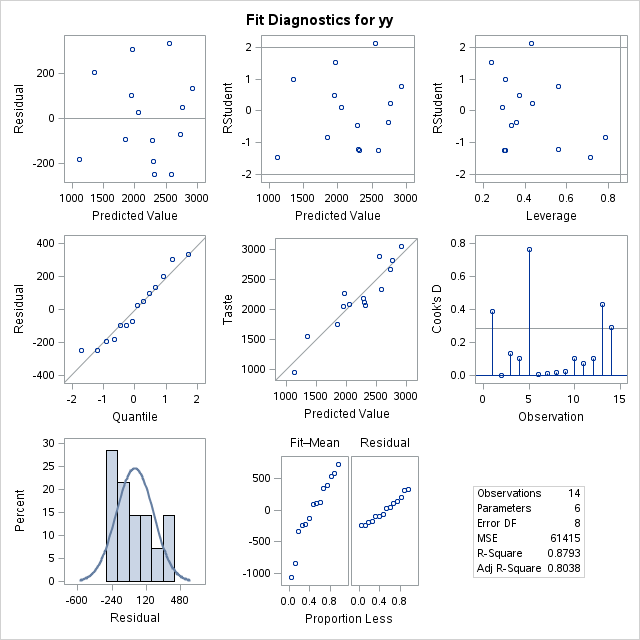
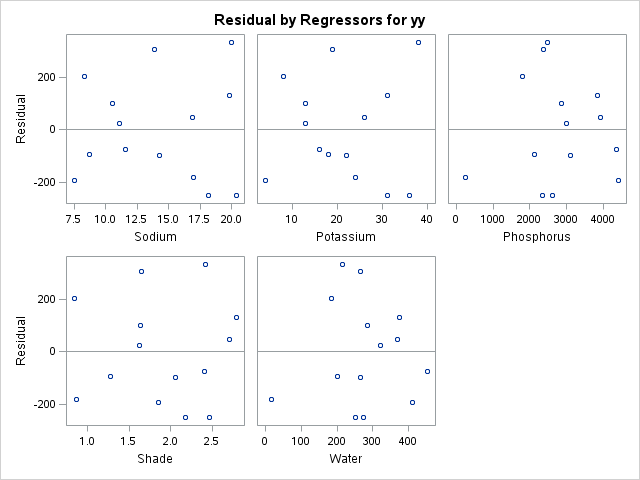

In [2]:
title3 'PROC REG of taste on 5 variables';
title4 'EVEN THOUGH THE MODEL TEST HAS P=0.0016 WITH Rsquare=0.88, NONE of';
title5 '  the INDIVIDUAL PARAMETER ESTIMATES are ANYWHERE NEAR significant!';
title6 'At least, as a consolation, there are no apparent problems with the';
title7 "  Studentized residuals, although observation #5 has a borderline";
title8 "  Cook-D value.";

proc reg;
     model yy = nat kk pp shade water / r;
     run;

proc corr nosimple;
     title3 'CORRELATIONS BETWEEN PAIRS of explanatory variables';
     var nat kk pp shade water;
     run;


proc glm;
     title3 'PROC GLM WITH TYPE I and TYPE II TABLES';
     model yy = nat--water;
     run;

### ********************************************************
    * The following code tells SAS to do a Principal Components
    *   procedure.  Note that the eigenvalues of the correlation
    *   matrix Corr(X) are prominently listed in the output.
    *
    * The option `output=pcadat' tells SAS to write the 5 PCs
    *   (linear combinations of the covariates) to a new dataset
    *   `pcadat' along with the original dataset.  By default, the
    *   PC data columns are named  PRIN1-PRIN5 .
    *
    * A useful graph is a plot of the k-th eigenvalue against k. In
    *   many cases, as you go from smaller to larger k, there will be
    *   a big drop after the eigenvalues that correspond to real
    *   `factors' in the covariate data and eigenvalues that are
    *   principally noise.

    * This graph is called a `scree plot', after a term (`scree') that
    *   means rubble found as the bottom of a cliff, which the
    *   randomness of the `noisy' smaller eigenvalues resemble.
    *   Unfortunately, SAS does not automatically generate scree plots
    *   for PCA. We will redo the PCA analysis below using proc iml
    *   in such a way to make it easy to generate a scree plot.
    *
### ********************************************************


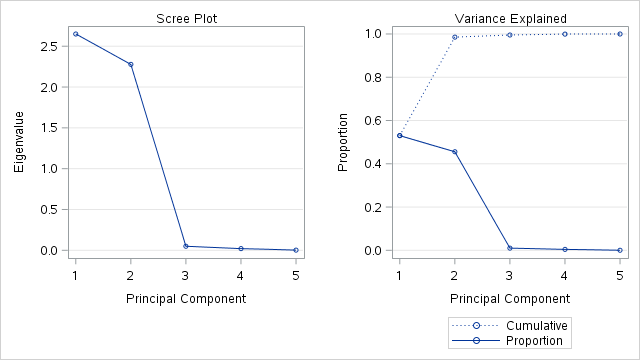

In [3]:
title3 'THE 5 PRINCIPAL COMPONENTS';

proc princomp out=pcadat;
     var nat kk pp shade water;
     run;


proc print data=pcadat;
     var prin1-prin5;
     run;

proc means data=pcadat mean var maxdec=4;
     title3 'MEANS AND VARIANCES OF PRIN1-PRIN5';
     title4 'Note that the means are zero and the variances are the same';
     title5 '  as the eigenvalues in the principal component output.';
     var prin1-prin5;
     run;

options ps=35;

proc factor scree mineigen=0;
     title3 "SCREE PLOT FROM PROC FACTOR";
     var nat kk pp shade water;
     run;

options ps=60;


proc corr data=pcadat;
     title3 'CORRELATIONS WITH AND WITHIN PRIN1-PRIN5';
     title4 'Note that Prin1-Prin5 are uncorrelated, as they should be.';
     title5 'Note that only Prin1 appears to be correlated with Taste';
     var yy prin1-prin5;
     run;

options ps=40;

proc plot data=pcadat;
     title4 'DATA IN A PRIN2*PRIN1 plot:';
     title5 'THIS SHOWS THE DISTRIBUTION of the n individual rows';
     title6 '  in the dataset in (Prin1,Prin2) coordinates.';
     title7 'THIS CAN ALSO BE USEFUL TO DETECT OUTLIERS.';
     plot prin2*prin1 = farm;
     run;

options ps=60;

~~~~
********************************************************;
* DOING PRINCIPAL COMPONENTS ANALYSIS (PCA) ON THE COVARIATES.
*   The default in SAS is to normalize each of the original data
*   columns (nat--water) to have mean zero and variance one before
*   finding the PCs.
*
* A FORMULA FOR THE PCs or PC DATA COLUMNS:
*
* Let v_1,v_2,...,v_5 be the 5 eigenvectors of the correlation matrix
*   Corr(X). By definition, the numbers y_1,y_2,..,y_5 in the
*   i-th row of the 5 PC data column matrix (also called the
*   PC SCORES for the i-th observation) are the coefficients
*   of v_1,v_2,..,v_5 in an expansion of the i-th row of X, so that
*
*      X_i = i-th row of X = Sum_{a=1}^5 y_a v_a
*
*   Here X is the 14x5 design matrix AFTER the columns have been
*   renormalized to have mean zero and sample variance one.
*
*   Let U = (v_1 v_2 ... v_5) be the orthogonal matrix with the
*   eigenvectors as columns. Thus v_a=Ue_a, where e_a is the a-th
*   coordinate unit vector, and
*
*      Sum_{a=1}^5 y_a v_a = Sum y_a Ue_a = U(Sum y_a e_a) = x
*
*   Now y = (y_1 y_2 ... y_5) = Sum y_a e_a by construction. Thus
*   Uy=X_i, so that y=U'X_i, where X_i is the i_th row of X
*   (viewed as a column vector).
*
* Writing out the last relation in terms of the 14x5 matrices Y
*   (for PC data columns) and X (the normalized design matrix),
*   Y_i=U'X_i for the i-th rows of both matrices implies
*
*      Y_{ia} = Sum_b (U')_ab X_ib = Sum_b X_ib U_ba
*
*   so that
*
*      Y = XU    (as 14x5 = (14x5)*(5x5) matrices)
*
*   expresses the PC data column matrix Y in terms of the normalized
*   covariate matrix X.  In particular, Y'Y = (XU)'(XU) = U'(X'X)U,
*   so that the sample covariance matrix of the PC data columns is
*
*      (1/(n-1))Y'Y = (1/(n-1)U'(X'X)U = U'AU
*
*   where A=Corr(X). Now  A = U(diag(la_1,...,la_n))U' is the
*   spectral theorem for A, so that
*
*      (1/(n-1))Y'Y = Cov(Y) = Diag(la_1,...,la_n)
*
*   is diagonal. Thus the 5 PC data columns are mutually orthogonal,
*   and the i-th PC data column has sample variance la_i.
********************************************************; 


********************************************************;
* READING THE EIGENVALUE and the FACTOR-LOADING (or EIGENVECTOR)
*   TABLE IN THE OUTPUT:
*
* The two most important parts of the PCA output are the Eigenvalue
*   Table and the ``factor-loading'' (or Eigenvector) table.
*
* In the output below, the Eigenvalue Table says that only PRIN1
*   and PRIN2 have eigenvalues > 0.10. This means that the
*   five-dimensional covariate data in R^14 is essentially only
*   two-dimensional, and that the overwhelming majority of the
*   original variation in the original covariate data is in the
*   first two PCs.
*
* The FACTOR-LOADING or EIGENVECTOR table is exactly the same as
*   the matrix U = (v_1 v_2 ... v_5) above, with v_a=Ue_a and 
*   e_a=U'v_a.  In particular, the columns of the table give the
*   coefficients of each principal component in terms of the 5
*   covariates AFTER THEY HAS BEEN NORMALIZED TO HAVE MEAN ZERO AND
*   VARIANCE ONE. The rows give the coefficients of each covariate
*   in terms of the 5 eigenvectors of Corr(X).  The fact that both
*   of these relationships can be given in the same table means that
*   the transpose of the transformation matrix for the original
*   covariate coordinates to PC coordinates is the same as its
*   inverse. This property characterizes orthogonal or rotation
*   matrices.
*
* Often one can tell from the factor-loading table what many of the
*   PCs are attempting to summarize, or at least the first one or
*   two PCs. In this case, one can see that the first PC is an
*   overall ``goodness index'', in which all of the original
*   covariates contribute more-or-less equally.
*
* The second PC gives a correction for relatively high (Na,K) and
*   relatively low (P,Water) with essentially no dependence on
*   Shade. Thus linear combinations of the first two PC data columns
*   are linear combinations of two factors, one involving (Na,K) and
*   the other involving (P,Water). The fifth PC is a correction for
*   low values of Shade and high values of the minerals (Na,K,P).
*   The other PCs are harder to interpret.
*
* The weights in the factor loading table are the squares of the
*   coefficients, not the coefficients themselves. Thus 0.35 
*   corresponds to a weight of 10% and 0.10 to a weight of 1%. Thus,
*   in understanding the meaning of PCs as an index of the original
*   covariates, coefficients smaller than 0.30 can generally be
*   ignored.
********************************************************;

********************************************************;
* We can get a better idea of how the data depends on PRIN1 and
*   PRIN2 by looking at the data sorted by PRIN1 and PRIN2:
*   In both cases, we sort the 14 farms by PRIN1, which is a
*   measure of their covariates, from `best' to `worst'.
********************************************************;
~~~~

Obs,yy,Prin1,nat,kk,pp,shade,water
1,3052,2.35080,19.8,31,3835,2.79,376
2,2815,1.94577,16.9,26,3922,2.70,369
3,2661,1.58859,11.6,16,4343,2.40,453
4,2338,1.23972,20.4,36,2601,2.47,275
5,2876,0.91340,20.0,38,2488,2.42,216
6,2064,0.45472,18.2,31,2335,2.17,252
7,2110,0.30961,7.5,4,4408,1.85,411
8,2181,0.24260,14.3,22,3110,2.05,267
9,2078,-0.43862,11.1,13,2998,1.62,321
10,2265,-0.58591,13.9,19,2360,1.65,265

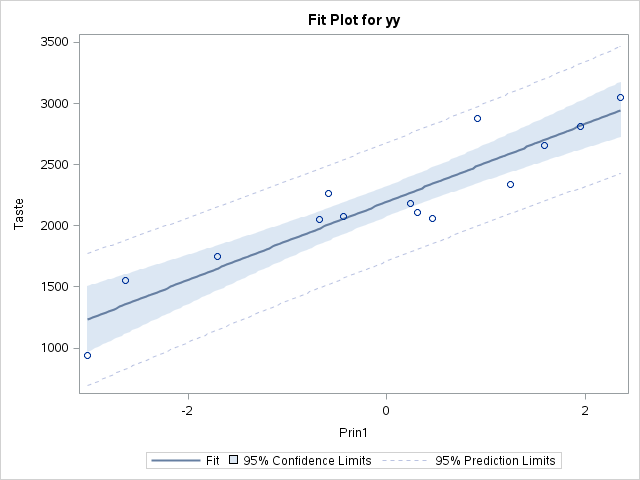

In [4]:
proc sort out=prinone;
     by descending prin1;  run;

proc print data=prinone;
     title3 'DATA SORTED BY THE FIRST PRINCIPAL COMPONENT';
     title4 'IS IT CLEAR HOW THE COVARIATES DEPEND ON PRIN1?';
     var yy prin1 nat--water;
     run;

proc sort out=printwo;
     by descending prin2;  run;

proc print data=printwo;
     title3 'DATA SORTED BY THE SECOND PRINCIPAL COMPONENT';
     title4 'IS IT CLEAR HOW THE COVARIATES DEPEND ON PRIN2?';
     var yy prin2 nat--water;
     run;

********************************************************;
* Now do `proc glm' for a regression on all 5 principal components.
*   Since the principal components are orthogonal, the Type I and
*   Type III tables are identical.
*
* Note that the Model Rsquare and Model P-values are exactly the
*   same as in the original regression.
********************************************************;

proc glm data=pcadat;
     title3 'PROC GLM of taste on 5 principal components';
     title4 'Note also that only Prin1 appears to affect Taste';
     model yy = prin1-prin5;
     run;

********************************************************;
* PRIN1 has the only statistically significant coefficient, so
*   let's try to regress Taste (YY) on PRIN1 alone. Note
*   that the model R^2 is almost the same as for all 5 covariates.
********************************************************;

proc glm data=pcadat;
     title3 'PROC GLM on the FIRST principal component ONLY';
     model yy = prin1;
     run;

In [5]:
********************************************************;
* To give a clearer idea of what is going on, let's do the same
*   things in Proc IML:
********************************************************;

title2 'PROC IML: REDOING THE PRINCIPAL COMPONENTS ANALYSIS';

proc iml;        * Start the IML environment;

use appledat;    * Make this the default IML SAS dataset;

* Note that X is 5x5, not 6x6 ;

read all var { nat kk pp shade water } into xx;

n=nrow(xx);      * Number of rows = 14    (farms);
r=ncol(xx);      * Number of columns = 5  (nat--water) ;

* A column vector of covariate names for tables: ;
varnames = { 'Sodium', 'Potassium', 'Phosphorus',
   'Shade', 'Water' };

* Generate the covariance and correlation matrices of X;

xxc = xx-(1/n)*j(n)*xx;    * Center covariates at covariate means;
xcov = xxc`*xxc/(n-1);    * COVARIANCE MATRIX of columns ;

print "The covariance matrix of the covariates:",
  varnames xcov [format=11.2];

xstdev = sqrt(diag(xcov));   * Diagonal matrix with stdevs of cols;
xnorm = xxc*inv(xstdev);     * NORMALIZED covariate columns;

* The following matrix is BOTH the covariance matrix of the ;
*   normalized covariates AND the correlation matrix of the ;
*   original covariates. ;

corr = xnorm`*xnorm/(n-1);

print "The CORRELATION MATRIX of the covariates:",
  varnames corr [format=11.4];

* Invoke a SAS routine that store the eigenvalues of the matrix
*   CORR in the 5x1 vector EGVALS and the normalized eigenvectors
*   of CORR as the corresponding column vectors in the 5x5 matrix
*   EGVECS. Since the eigenvectors are normalized and orthogonal,
*   EGVECS is an orthogonal matrix, and
*
*        CORR = EGVECS*DIAG(EGVALS)*EGVECS`     ;
*                                               ;

call eigen(egvals,egvecs, corr);

print "The eigenvalues and normalized eigenvectors of CORR:", 
  "THE `FACTOR LOADINGS' are the columns of EGVECS",
  "  These define the `Principal Component factors' in terms",
  "  of the original variables.",
  "The `FACTOR WEIGHTINGS' are the rows of EGVECS",
  "  These reverse the transformation.",
   egvals  [format=8.4]  "   " varnames  egvecs [format=8.4];

* The PC data columns (these are the same as PRIN1-PRIN5):;

yy = xnorm*egvecs;

* Generate an `observation number' column;

obs=j(n,1);   * Allocate room for observation numbers;
do i=1 to n;  obs[i]=i;  end;  * Define observation numbers;

* The output should be the same as the proc print output ;
*   for PRIN1-PRIN5;

print "The PCs themselves are",
  obs "   " yy [format=9.5];

covpcdat = yy`*yy/(n-1);  * COVARIANCE MATRIX of PC data columns;

prnames = { 'PRIN1', 'PRIN2', 'PRIN3', 'PRIN4', 'PRIN5' };

* The following should be a diagonal matrix with the eigenvalues ;
*   on the diagonal;

print "The covariance matrix for Y (PC data columns or PC scores) is",
  prnames "   " covpcdat [format=8.4];

* Finally, let's create (export) a SAS dataset so that ;
*   `proc plot' can write a SCREE PLOT:;

* First, set eval = { 1, 2, 3, ..., r };

eval=j(r,1);   * A column vector with space for r values;
do i=1 to r;  eval[i]=i;  end;

* This exports a data set named `scree';
create scree var { eval egvals };
append;

quit;  * Quit Proc IML;


title2 "WE ARE NOW BACK IN REGULAR SAS (NOT PROC IML):";
title3 "SCREE PLOT FOR EIGENVALUES FOR APPLE COVARIATES";

proc plot data=scree;
     plot egvals*eval = eval / vpos=30;
     run;